In [ ]:
# Install required libraries
!pip install pandas geopandas plotly gender_guesser

# Import required libraries
import pandas as pd
import geopandas as gpd
from shapely import wkt
import plotly.express as px
from gender_guesser.detector import Detector
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('/content/Rental_Properties_20241203.csv')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 6.1 MB/s eta 0:00:00


Saving Rental_Properties_20241208.csv to Rental_Properties_20241208.csv



This code cleans and prepares a dataset for analysis. It begins by converting the expiredate column into a datetime format, ensuring time-based data can be analyzed accurately. Rows with missing geographic coordinates in the geo column are removed to retain only valid geographic entries. The geo data, provided in WKT format, is then parsed into geometric objects, and latitude and longitude are extracted for mapping and spatial analysis. Additionally, rows with missing values in critical columns like property_address, status, property_type, and contact_name are dropped to ensure the dataset is complete and reliable. The resulting dataset is clean and well-structured, ready for advanced spatial or property-type-specific visualizations and analysis.

In [ ]:
# Convert 'expiredate' to datetime
data['expiredate'] = pd.to_datetime(data['expiredate'], errors='coerce')

# Remove rows with null geographic coordinates
data = data[data['geo'].notnull()]
data['geometry'] = data['geo'].apply(wkt.loads)

# Clean and extract latitude and longitude
geo_data = gpd.GeoDataFrame(data, geometry='geometry')
geo_data['latitude'] = geo_data.geometry.y
geo_data['longitude'] = geo_data.geometry.x

# Drop rows with missing key data
geo_data = geo_data.dropna(subset=['property_address', 'status', 'property_type', 'contact_name'])

Where are the high-density areas of multi-family rental properties located?

This code creates an interactive map to visualize high-density areas of multi-family rental properties. The geo column, which contains geographic data in WKT format, is parsed using the shapely library to extract latitude and longitude coordinates. The data is filtered to include only properties classified as "Multi Family Dwelling." These filtered properties are plotted on a map using Plotly's scatter_mapbox, where each point represents a property. The size of the points reflects the number of units, and hovering over a point displays additional details like the property address, status, and contact name. The map uses the "carto-positron" style and a default zoom level for clarity, providing an interactive and detailed visualization of multi-family rental property distribution.

In [ ]:
# Install required libraries if not already installed
!pip install geopandas plotly

import geopandas as gpd
import plotly.express as px
from shapely import wkt

# Parse the geo column to extract coordinates
data['geometry'] = data['geo'].apply(wkt.loads)
geo_data = gpd.GeoDataFrame(data, geometry='geometry')
geo_data['latitude'] = geo_data.geometry.y
geo_data['longitude'] = geo_data.geometry.x

# Filter for multi-family properties
multi_family = geo_data[geo_data['property_type'] == 'Multi Family Dwelling']

# Plot interactive map
fig = px.scatter_mapbox(
    multi_family,
    lat="latitude",
    lon="longitude",
    size="units",
    hover_name="property_address",
    hover_data=["status", "contact_name"],
    title="High-Density Areas of Multi-Family Rental Properties",
    mapbox_style="carto-positron",
    zoom=10,
    height=600
)
fig.show()

2. How have permit statuses evolved over the years?

This code is used to analyze and visualize trends in permit statuses over time, making it easier to understand the historical evolution of permits. By converting the expiration dates into a consistent datetime format and grouping the data by year and status, it aggregates the number of permits for each combination. The resulting time-series visualization highlights patterns, trends, and changes in the distribution of permit statuses, such as active, expired, or pending, across different years. This analysis is particularly useful for regulatory reporting, urban planning, or monitoring permit-related activities to identify areas for process improvement or policy adjustments.

In [ ]:
# Install required libraries if not already installed
!pip install pandas plotly

import pandas as pd
import plotly.express as px

# Convert expiredate to datetime
data['expiredate'] = pd.to_datetime(data['expiredate'], errors='coerce')

# Aggregate data for time-series visualization
time_series = data.groupby([data['expiredate'].dt.year, 'status']).size().reset_index(name='count')
time_series.columns = ['year', 'status', 'count']

# Plot time-series visualization
fig = px.line(
    time_series,
    x="year",
    y="count",
    color="status",
    markers=True,
    title="Evolution of Permit Statuses Over the Years",
    labels={"year": "Year", "count": "Number of Permits", "status": "Permit Status"}
)
fig.show()

3. Are there gender disparities in property ownership trends?

This code infers and visualizes the gender distribution of property contacts based on their first names. Using the gender_guesser library, it extracts the first name from the contact_name column and predicts the gender, standardizing the results into simplified categories like Male, Female, Androgynous, and Unknown. The data is then aggregated to calculate the count of contacts in each gender category. Finally, a pie chart is generated using Plotly Express to visually represent the gender-based ownership distribution, providing insights into the demographics of property contacts.








In [ ]:
# Install required libraries
# Uncomment these lines to install the required libraries if running locally
# !pip install gender-guesser plotly pandas

import pandas as pd
from gender_guesser.detector import Detector
import plotly.express as px

# Initialize the gender detector
d = Detector()

# Sample data for demonstration (replace with your actual dataset loading process)
data = pd.read_csv('/content/Updated_Rental_Properties_with_Gender_Column__No_Unknown_.csv')  # Replace with your actual dataset file path

# Infer gender using the first name from contact_name
data['first_name'] = data['contact_name'].str.split().str[0]
data['gender'] = data['first_name'].apply(lambda x: d.get_gender(x) if isinstance(x, str) else 'unknown')

# Simplify gender labels
gender_map = {
    'male': 'Male',
    'mostly_male': 'Male',
    'female': 'Female',
    'mostly_female': 'Female',
    'andy': 'Androgynous',
    'unknown': 'Unknown'
}
data['gender'] = data['gender'].map(gender_map)

# Aggregate gender data for visualization
gender_counts = data['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Plot gender distribution
fig = px.pie(
    gender_counts,
    names='gender',
    values='count',
    title="Gender-Based Ownership Insights",
    hole=0.4,
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.show()


How does property ownership differ across genders for different property types?

This code infers and visualizes the gender distribution of property contacts based on their first names. Using the gender_guesser library, it extracts the first name from the contact_name column and predicts the gender, standardizing the results into simplified categories like Male, Female, Androgynous, and Unknown. The data is then aggregated to calculate the count of contacts in each gender category. Finally, a pie chart is generated using Plotly Express to visually represent the gender-based ownership distribution, providing insights into the demographics of property contacts.

In [ ]:
import plotly.express as px

# Group data by property type and gender
gender_property_distribution = data.groupby(['property_type', 'gender']).size().reset_index(name='count')

# Filter out 'Unknown' gender if needed
filtered_data = gender_property_distribution[gender_property_distribution['gender'] != 'Unknown']

# Create a bar chart
fig = px.bar(
    filtered_data,
    x='property_type',
    y='count',
    color='gender',
    title="Gender-Based Ownership Across Property Types",
    labels={'count': 'Number of Properties', 'property_type': 'Property Type'},
    barmode='group',
    text='count',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Enhance visualization
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Property Type', yaxis_title='Number of Properties')

fig.show()


4. How do property types and ownership models vary in the rental market?

This code aggregates and visualizes data on property types and ownership models. It groups the dataset by property_type and contact_type, calculating the count of each ownership model for each property type. The results are visualized using a grouped bar chart, where each bar represents the number of properties associated with a specific ownership type for each property category. The chart is color-coded by ownership type, making it easier to compare and analyze trends in property distribution and ownership patterns.

In [ ]:
# Aggregate data for property type and ownership
ownership_data = data.groupby(['property_type', 'contact_type']).size().reset_index(name='count')

# Plot bar chart
fig = px.bar(
    ownership_data,
    x="property_type",
    y="count",
    color="contact_type",
    barmode="group",
    title="Distribution of Property Types and Ownership Models",
    labels={"property_type": "Property Type", "count": "Number of Properties", "contact_type": "Ownership Type"}
)
fig.show()

6. Are larger properties concentrated in areas with specific permit statuses?

This code creates a scatter plot to visualize the relationship between property size (represented by the number of buildings and units) and permit status. Each point on the plot represents a property, with the x-axis showing the number of buildings and the y-axis showing the number of units. The points are color-coded by permit status, with their size proportional to the number of units. Hovering over a point reveals additional details, such as the property's address. This visualization helps identify patterns or clusters in property size and permit status.

In [ ]:
# Scatter plot for property size vs permit status
fig = px.scatter(
    data,
    x="buildings",
    y="units",
    color="status",
    size="units",
    hover_name="property_address",
    title="Property Size vs Permit Status",
    labels={"buildings": "Number of Buildings", "units": "Number of Units"}
)
fig.show()

How do rental property permit statuses vary geographically, and what patterns can be observed in areas with high property density?

This code visualizes the geographic distribution of properties and their permit statuses using a scatter map. It begins by preparing the dataset, ensuring the geo column (in WKT format) is converted into valid geometric shapes. The data is then aggregated by city (contact_city) to calculate the total number of properties and the distribution of permit statuses within each city. Geographic coordinates (latitude and longitude) are extracted based on the centroids of city geometries. Using Plotly's scatter_mapbox, the properties are plotted on a map, where each city is represented by points sized according to the number of buildings and colored by permit status. Hovering over a point reveals additional details, such as property type, contact name, and city. The visualization uses a clean base map style ("carto-positron") and a continuous color scale to enhance clarity and interpretability, offering insights into geographic patterns of property ownership and permit status distribution.

In [ ]:
# Install necessary libraries
!pip install geopandas plotly

# Import libraries
import pandas as pd
import geopandas as gpd
import plotly.express as px
from shapely import wkt

# Ensure data has a proper geometry column
geo_data['geometry'] = geo_data['geo'].apply(wkt.loads)

# Simplify regions using city-based aggregation
city_data = geo_data.groupby('contact_city').size().reset_index(name='property_count')
city_status = geo_data.groupby(['contact_city', 'status']).size().unstack(fill_value=0).reset_index()
city_data = pd.merge(city_data, city_status, on='contact_city', how='left')

# Generate dummy latitude and longitude (for visualization purposes)
city_coords = geo_data.groupby('contact_city').geometry.apply(lambda x: x.iloc[0].centroid)
city_data['latitude'] = city_coords.apply(lambda x: x.y)
city_data['longitude'] = city_coords.apply(lambda x: x.x)

# Create the choropleth using aggregated counts
# Validate geographic points by plotting them directly
# Corrected hover_data to use valid column names from the dataset
fig = px.scatter_mapbox(
    geo_data,
    lat="latitude",
    lon="longitude",
    size="buildings",
    color="status",  # Valid column for color coding
    hover_name="property_address",
    hover_data=["property_type", "contact_name", "contact_city"],  # Valid columns
    title="Scatter-Based Visualization of Property Counts by City",
    mapbox_style="carto-positron",
    color_continuous_scale="Viridis",
    zoom=10
)

fig.show()

What is the distribution of property ownership by gender, and does it vary by property type?

This code visualizes the gender distribution of property ownership across different property types. It groups the dataset by property_type and gender, calculating the count of properties owned by each gender within each property type. The resulting data is plotted as a bar chart using Plotly Express, where the x-axis represents property types, the y-axis shows the number of properties, and the bars are color-coded by gender. This visualization helps identify patterns or disparities in property ownership by gender for various property categories, making it easier to analyze demographic trends and insights related to property ownership.

In [ ]:
gender_distribution = data.groupby(['property_type', 'gender']).size().reset_index(name='count')

fig = px.bar(
    gender_distribution,
    x="property_type",
    y="count",
    color="gender",
    title="Gender Distribution of Property Ownership by Property Type",
    labels={"property_type": "Property Type", "count": "Number of Properties", "gender": "Gender"}
)
fig.show()

What proportion of high-demand areas is dominated by specific property types?

This code identifies and visualizes the distribution of property types in high-demand areas. High-demand areas are defined as locations with a number of buildings greater than the dataset's average. The subset of data representing these areas is analyzed to calculate the frequency of each property type. The results are visualized using a pie chart created with Plotly Express, where each slice represents a property type, and the size reflects its proportion in high-demand areas. The chart uses a sequential color scheme (RdBu) for a visually appealing representation. This analysis helps identify the predominant property types in areas with high building densities, offering insights into real estate trends and demand patterns.






In [ ]:
high_demand_data = geo_data[geo_data['buildings'] > geo_data['buildings'].mean()]
property_type_distribution = high_demand_data['property_type'].value_counts().reset_index()
property_type_distribution.columns = ['property_type', 'count']

fig = px.pie(
    property_type_distribution,
    names='property_type',
    values='count',
    title="Property Type Distribution in High-Demand Areas",
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.show()

In [ ]:
!pip install plotly folium

How evenly distributed are the different property types?

This code visualizes the distribution of property types in a dataset by creating a bar chart. The dataset is loaded, and the property_type column is analyzed to calculate the frequency of each property type. The resulting data is organized into a new DataFrame, where each property type is listed alongside its count. A bar chart is then generated using Plotly Express, with the x-axis representing property types, the y-axis showing their counts, and text annotations displaying the exact count values above each bar. This visualization provides a clear overview of the prevalence of different property types within the dataset.

In [ ]:
import pandas as pd
import plotly.express as px

# Load your dataset
file_path = "/content/Rental_Properties_20241203.csv"  # Ensure this file is uploaded in your Colab environment
rental_data = pd.read_csv(file_path)

# Count property types
property_distribution = rental_data['property_type'].value_counts().reset_index()
property_distribution.columns = ['Property Type', 'Count']

# Create a bar chart
fig = px.bar(
    property_distribution,
    x='Property Type',
    y='Count',
    title='Distribution of Property Types',
    text='Count'
)
fig.update_traces(textposition='outside')
fig.show()

Which property type has the highest average number of units per building?

This code calculates and visualizes the average number of units per building for each property type. It groups the dataset by property_type, calculates the mean of the units column for each group, and creates a new DataFrame with the average values. A bar chart is then generated using Plotly Express, where the x-axis represents property types and the y-axis shows the average number of units. Text annotations display the exact average values above each bar, making the visualization informative and easy to interpret. This analysis helps to understand the typical size of buildings across different property categories.

In [ ]:
# Average units per building by property type
avg_units = rental_data.groupby('property_type')['units'].mean().reset_index()
avg_units.columns = ['Property Type', 'Average Units']

# Bar chart for average units
fig = px.bar(avg_units, x='Property Type', y='Average Units', title='Average Units Per Building by Property Type', text='Average Units')
fig.update_traces(textposition='outside')
fig.show()

How are properties distributed across different statuses?

This code visualizes the distribution of property statuses in the dataset using a pie chart. The status column is analyzed to calculate the count of each unique status, and the results are stored in a new DataFrame with two columns: Status and Count. A pie chart is then created using Plotly Express, with each slice representing a property status and its size reflecting the count of properties with that status. The chart includes a hole in the center (donut chart style) for better readability. This visualization provides an overview of the relative proportions of different property statuses.

In [ ]:
# Count property statuses
status_distribution = rental_data['status'].value_counts().reset_index()
status_distribution.columns = ['Status', 'Count']

# Create a pie chart
fig = px.pie(status_distribution, names='Status', values='Count', title='Property Status Distribution', hole=0.4)
fig.show()

Are there more properties managed by owners or agents in the dataset?

This code visualizes the distribution of properties managed by different contact types (e.g., owners or agents) using a bar chart. The contact_type column is analyzed to calculate the count of each type, and the results are organized into a new DataFrame with columns Contact Type and Count. A bar chart is created using Plotly Express, where the x-axis represents contact types, the y-axis shows the count of properties, and text annotations display the exact count values above each bar. This visualization highlights the comparative prevalence of owner-managed versus agent-managed properties.

In [ ]:
# Count contact types
contact_distribution = rental_data['contact_type'].value_counts().reset_index()
contact_distribution.columns = ['Contact Type', 'Count']

# Create a bar chart
fig = px.bar(contact_distribution, x='Contact Type', y='Count', title='Owner vs Agent Managed Properties', text='Count')
fig.update_traces(textposition='outside')
fig.show()

Where are multi-family dwellings located geographically?

This code creates an interactive map to visualize the locations of multi-family dwellings in the dataset using Folium and marker clustering. The map is centered at the average latitude and longitude of all properties, calculated by extracting coordinates from the geo column in WKT format. A marker cluster layer is added to group nearby markers, making the map more readable in areas with high property density. The dataset is filtered to include only multi-family dwellings, and each property's location is marked on the map, with a popup displaying the property address when clicked. The map is saved as an HTML file (map.html) for easy viewing in a web browser. This visualization provides a clear, interactive way to explore the geographic distribution of multi-family dwellings, identify clusters, and examine individual property details.

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Initialize a map
map_center = [rental_data['geo'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')[1].astype(float).mean(),
              rental_data['geo'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')[0].astype(float).mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add marker clusters for multi-family properties
marker_cluster = MarkerCluster().add_to(m)
for _, row in rental_data[rental_data['property_type'] == 'Multi Family Dwelling'].iterrows():
    coords = row['geo'].strip('POINT ()').split()
    folium.Marker(location=[float(coords[1]), float(coords[0])], popup=row['property_address']).add_to(marker_cluster)

m.save('map.html')  # Save as HTML
m

How many permits are set to expire in the next year?

This code analyzes and visualizes the distribution of permits set to expire within the next year. It begins by converting the expiredate column to a datetime format to ensure accurate date calculations. Permits with expiration dates within the next 365 days are filtered, and the counts are grouped by the month of expiration. A line chart is then created using Plotly Express, with the x-axis representing the months and the y-axis showing the count of expiring permits. This visualization provides insights into monthly trends for expiring permits, helping stakeholders plan and prioritize renewal processes.

In [ ]:
# Convert expiredate to datetime
rental_data['expiredate'] = pd.to_datetime(rental_data['expiredate'], errors='coerce')

# Count permits expiring in the next year
from datetime import datetime, timedelta
next_year = datetime.now() + timedelta(days=365)
expiring_permits = rental_data[rental_data['expiredate'] <= next_year].groupby(rental_data['expiredate'].dt.month).size()

# Line chart
fig = px.line(x=expiring_permits.index, y=expiring_permits.values, title='Permits Expiring in the Next Year',
              labels={'x': 'Month', 'y': 'Count'})
fig.show()

Which property type has the highest average building-to-unit ratio?


This code calculates and visualizes the building-to-unit ratio for different property types in the dataset. It computes the ratio of units to buildings for each record, groups the data by property_type, and calculates the average ratio for each group. The results are presented as a bar chart using Plotly Express, where the x-axis represents property types, the y-axis shows the average building-to-unit ratio, and text annotations display the exact ratios above each bar. This analysis helps to understand the density of units per building across various property categories, providing insights into the architectural and operational characteristics of different property types.

In [ ]:
# Building-to-unit ratio by property type
building_to_unit_ratio = (rental_data['units'] / rental_data['buildings']).groupby(rental_data['property_type']).mean().reset_index()
building_to_unit_ratio.columns = ['Property Type', 'Building-to-Unit Ratio']

# Bar chart
fig = px.bar(building_to_unit_ratio, x='Property Type', y='Building-to-Unit Ratio', title='Building-to-Unit Ratio by Property Type', text='Building-to-Unit Ratio')
fig.update_traces(textposition='outside')
fig.show()



What is the trend of permit expirations for different property types over time?

This code analyzes and visualizes trends in permit expirations over time, categorized by property type. It first converts the expiredate column to datetime format and extracts the expiration year into a new column, year. The data is then grouped by year and property_type, counting the number of expirations for each combination. An area chart is created using Plotly Express, where the x-axis represents the years, the y-axis shows the count of expirations, and different property types are color-coded. The visualization provides insights into how permit expirations have varied over time for different property types.

In [ ]:
# Convert expiredate to datetime format
rental_data['expiredate'] = pd.to_datetime(rental_data['expiredate'], errors='coerce')

# Group data by year and property type
rental_data['year'] = rental_data['expiredate'].dt.year
expirations_by_year = rental_data.groupby(['year', 'property_type']).size().reset_index(name='Count')

import plotly.express as px

# Create an area chart
fig = px.area(
    expirations_by_year,
    x='year',
    y='Count',
    color='property_type',
    title="Permit Expiration Trends by Property Type Over Time"
)
fig.show()

Where are the rental properties in Bloomington located geographically?

This code generates an interactive map to visualize rental properties in Bloomington, highlighting their geographic distribution and property counts by ZIP code. The dataset is first filtered to include only properties located in Bloomington, identified through the contact_city column. It then groups the properties by ZIP codes to calculate the number of properties in each area. A Folium map is created, centered on Bloomington, with marker clustering to display individual property locations. Each marker includes a popup showing the property address and ZIP code. ZIP codes with fewer than five properties are highlighted using red markers to draw attention to low-density areas. The map is saved as an HTML file (Bloomington_Property_Map.html), allowing for interactive exploration. This visualization provides insights into property distribution across Bloomington, identifies high- and low-density areas, and offers a detailed view of individual properties and their locations.

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the dataset
file_path = "/content/Rental_Properties_20241203.csv"
rental_data = pd.read_csv(file_path)

# Filter properties located in Bloomington
bloomington_data = rental_data[rental_data['contact_city'].str.contains("Bloomington", na=False, case=False)]

# Extract geographical data and count properties per area (using ZIP codes as an example)
bloomington_data['contact_zip'] = bloomington_data['contact_zip'].astype(str)
property_count_by_zip = bloomington_data['contact_zip'].value_counts().reset_index()
property_count_by_zip.columns = ['ZIP Code', 'Property Count']

# Set a central location for Bloomington (approximate latitude and longitude)
map_center = [39.1653, -86.5264]
m = folium.Map(location=map_center, zoom_start=12)

# Add marker clusters for properties
marker_cluster = MarkerCluster().add_to(m)
for _, row in bloomington_data.iterrows():
    coords = row['geo'].strip('POINT ()').split()
    folium.Marker(
        location=[float(coords[1]), float(coords[0])],
        popup=f"Address: {row['property_address']}, ZIP: {row['contact_zip']}"
    ).add_to(marker_cluster)

# Highlight areas with fewer properties based on ZIP codes
for _, row in property_count_by_zip.iterrows():
    if row['Property Count'] < 5:  # Threshold for 'few properties'
        folium.Marker(
            location=map_center,  # Replace with actual coordinates for ZIP regions if available
            popup=f"ZIP: {row['ZIP Code']}, Count: {row['Property Count']}",
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)

# Save the map as an interactive HTML file
m.save("Bloomington_Property_Map.html")

<ipython-input-21-49fec88b8a60>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Which ZIP code in Bloomington has the highest number of rental properties?

This code creates a bar chart to visualize the density of rental properties in Bloomington by ZIP code. The dataset is grouped by contact_zip to calculate the number of properties in each ZIP code. The resulting data is plotted using Plotly Express, where the x-axis represents the ZIP codes, and the y-axis shows the property counts. Text annotations display the exact count values above each bar for clarity. This visualization highlights areas in Bloomington with high or low concentrations of rental properties, providing insights into property distribution across ZIP codes.

In [ ]:
import plotly.express as px

# Count properties by ZIP Code
bloomington_density = bloomington_data['contact_zip'].value_counts().reset_index()
bloomington_density.columns = ['ZIP Code', 'Property Count']

# Create Bar Chart
fig = px.bar(
    bloomington_density,
    x="ZIP Code",
    y="Property Count",
    title="Property Density in Bloomington by ZIP Code",
    text="Property Count",
)
fig.update_traces(textposition="outside")
fig.show()

Which ZIP code has the highest diversity in property types?

This code visualizes the distribution of property types across different ZIP codes in Bloomington using a stacked bar chart. The dataset is grouped by contact_zip and property_type to calculate the count of each property type in every ZIP code. The resulting data is plotted with the x-axis representing ZIP codes and the y-axis showing property counts, color-coded by property type. This visualization provides a detailed breakdown of property types within each ZIP code, highlighting how property types are distributed across the city and identifying ZIP codes with diverse or dominant property types.



In [ ]:
# Group by ZIP Code and Property Type
property_type_distribution = bloomington_data.groupby(['contact_zip', 'property_type']).size().reset_index(name='Count')

# Stacked Bar Chart
fig = px.bar(
    property_type_distribution,
    x="contact_zip",
    y="Count",
    color="property_type",
    title="Type of Properties by Area (ZIP Code)",
    labels={"contact_zip": "ZIP Code", "Count": "Property Count"},
)
fig.show()

Which ZIP code has the highest average number of units per building?

This code calculates and visualizes the average number of units per building for each ZIP code in Bloomington. The dataset is grouped by contact_zip, and the mean number of units is computed for each ZIP code. The results are plotted as a bar chart, where the x-axis represents ZIP codes, and the y-axis shows the average units per building. Text annotations display the exact average values above each bar, making the data easier to interpret. This visualization provides insights into the building density and property characteristics within each ZIP code.



In [ ]:
# Calculate average units per building for each ZIP Code
avg_units_per_building = bloomington_data.groupby('contact_zip')['units'].mean().reset_index()
avg_units_per_building.columns = ['ZIP Code', 'Average Units']

# Bar Chart
fig = px.bar(
    avg_units_per_building,
    x="ZIP Code",
    y="Average Units",
    title="Average Units per Building by ZIP Code",
    text="Average Units"
)
fig.update_traces(textposition="outside")
fig.show()

Which ZIP code has the highest number of active permits?

This code visualizes the distribution of permit statuses across different ZIP codes in Bloomington using a stacked bar chart. The dataset is grouped by contact_zip and status to calculate the count of each permit status within each ZIP code. The resulting data is plotted with the x-axis representing ZIP codes, the y-axis showing the count of permits, and color coding used to differentiate the permit statuses. This visualization helps identify patterns and trends in permit statuses, highlighting areas with high activity or potential issues such as expired or pending permits.

In [ ]:
# Group by ZIP Code and Status
permit_status_distribution = bloomington_data.groupby(['contact_zip', 'status']).size().reset_index(name='Count')

# Stacked Bar Chart
fig = px.bar(
    permit_status_distribution,
    x="contact_zip",
    y="Count",
    color="status",
    title="Permit Status Distribution by Area (ZIP Code)",
    labels={"contact_zip": "ZIP Code", "Count": "Permit Count"},
)
fig.show()

Which ZIP codes have the highest number of owner-managed properties?

This code visualizes the distribution of ownership types (e.g., owner-managed vs. agent-managed properties) across different ZIP codes in Bloomington using a grouped bar chart. The dataset is grouped by contact_zip and contact_type to calculate the count of properties for each ownership type in every ZIP code. The chart uses color coding to differentiate ownership types, with the x-axis representing ZIP codes and the y-axis showing property counts. This visualization provides insights into the prevalence of different property management types across various areas, helping to identify trends and patterns in ownership.

In [ ]:
# Group by Contact Type and ZIP Code
ownership_distribution = bloomington_data.groupby(['contact_zip', 'contact_type']).size().reset_index(name='Count')

# Bar Chart
fig = px.bar(
    ownership_distribution,
    x="contact_zip",
    y="Count",
    color="contact_type",
    title="Owner vs Agent Managed Properties by ZIP Code",
    labels={"contact_zip": "ZIP Code", "Count": "Property Count"},
)
fig.show()

Are there geographic clusters of properties in Bloomington?

This code generates a heatmap to visualize the geographic distribution and density of properties in Bloomington. The geographic coordinates are extracted from the geo column, isolating valid latitude and longitude values. The heatmap highlights areas with higher concentrations of properties using intensity gradients. Additionally, scatter points are overlaid to mark individual property locations, represented as blue circular markers for better clarity. The map is centered on Bloomington and displayed with a default zoom level. Finally, the map is saved as an interactive HTML file (Bloomington_Property_Heatmap.html) for detailed exploration.



Why Replace Choropleth?

ZIP code boundaries may not be visually engaging without detailed geojson data. A heatmap with a scatter overlay will be more effective.

In [ ]:
import folium
from folium.plugins import HeatMap

# Extract coordinates from `geo` column
bloomington_data['latitude'] = bloomington_data['geo'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')[1].astype(float)
bloomington_data['longitude'] = bloomington_data['geo'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')[0].astype(float)

# Create Heatmap
heatmap_data = bloomington_data[['latitude', 'longitude']].dropna()
m = folium.Map(location=[39.1653, -86.5264], zoom_start=12)
HeatMap(data=heatmap_data.values).add_to(m)

# Overlay scatter points for property locations
for _, row in heatmap_data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color="blue",
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Save the map
m.save("Bloomington_Property_Heatmap.html")

<ipython-input-27-52d7b7e034f2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-52d7b7e034f2>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Type of Properties in Each Area (Enhanced Stacked Bar Chart)
Why Improve?

Adding percentages makes the contribution of each property type more understandable.

Which ZIP codes have the highest diversity in property types (even distribution)?

This code visualizes the percentage distribution of property types across different ZIP codes in Bloomington using a normalized stacked bar chart. The dataset is grouped by contact_zip and property_type to calculate the count of each property type within each ZIP code. These counts are then normalized to percentages, showing the relative proportions of property types in each ZIP code. The resulting chart uses color coding to distinguish property types, with the x-axis representing ZIP codes and the y-axis displaying percentages. Text annotations inside the bars show the exact percentages, making the visualization clear and insightful. This analysis highlights the composition of property types within each ZIP code.



In [ ]:
# Group by ZIP Code and Property Type, normalize for percentages
property_type_distribution = bloomington_data.groupby(['contact_zip', 'property_type']).size().reset_index(name='Count')
property_type_distribution['Percentage'] = property_type_distribution.groupby('contact_zip')['Count'].transform(lambda x: x / x.sum() * 100)

# Stacked Bar Chart with Percentages
fig = px.bar(
    property_type_distribution,
    x="contact_zip",
    y="Percentage",
    color="property_type",
    title="Percentage Distribution of Property Types by ZIP Code",
    labels={"contact_zip": "ZIP Code", "Percentage": "Property Percentage"},
)
fig.update_traces(texttemplate='%{y:.1f}%', textposition='inside')
fig.show()

Which ZIP codes have the highest average number of units per building?

This code calculates and visualizes the average number of units per building for each ZIP code in Bloomington, incorporating error bars to represent variability. The dataset is grouped by contact_zip, and the mean (Average Units) and standard deviation (Std Dev) of the units column are computed for each ZIP code. A bar chart is created using Plotly Express, where the x-axis represents ZIP codes, the y-axis shows the average units, and the error bars reflect the standard deviation. This visualization provides insights into both the central tendency and variability of building sizes across ZIP codes, helping to identify areas with consistent or highly variable unit counts.

Average Units per Building per Area (Enhanced Bar Chart)
Why Improve?

Add error bars to show variation (e.g., standard deviation) for more context.

In [ ]:
# Calculate average units and standard deviation
units_stats = bloomington_data.groupby('contact_zip')['units'].agg(['mean', 'std']).reset_index()
units_stats.columns = ['ZIP Code', 'Average Units', 'Std Dev']

# Bar Chart with Error Bars
fig = px.bar(
    units_stats,
    x="ZIP Code",
    y="Average Units",
    error_y="Std Dev",
    title="Average Units per Building by ZIP Code (with Error Bars)",
    labels={"ZIP Code": "ZIP Code", "Average Units": "Units"}
)
fig.show()

What is the most common permit status in ZIP code 47401?

This code filters the data to focus on a specific ZIP code (47401) and visualizes the distribution of permit statuses within that ZIP code using a pie chart. The filtered data includes counts of each permit status for the specified ZIP code. The pie chart uses these counts to represent the proportions of different statuses, with each slice representing a status category. This visualization provides a detailed breakdown of permit statuses in the selected ZIP code, making it easy to identify the dominant status or areas requiring attention.



 Permit Status Distribution (Pie Chart for Simplicity)
Why Change?

A pie chart makes it easier to interpret proportions for each ZIP code.

In [ ]:
# Filter data for a specific ZIP Code (e.g., '47401')
zip_specific_data = permit_status_distribution[permit_status_distribution['contact_zip'] == '47401']

# Pie Chart
fig = px.pie(
    zip_specific_data,
    names="status",
    values="Count",
    title="Permit Status Distribution for ZIP Code 47401"
)
fig.show()

Are there any spikes or trends in the number of permits expiring over time?

This code creates a line chart with markers to visualize the trend of expiring permits over time. The x-axis represents the expiration dates, and the y-axis shows the number of permits set to expire on each date. The addition of markers highlights specific data points along the trend line, making it easier to identify key dates with significant changes or spikes in expiring permits. This visualization provides a clear and detailed view of how expiring permits are distributed over time, helping to identify patterns or plan for upcoming renewals.

Expiration Trends by Area (Enhanced Line Chart with Markers)
Why Improve?

Adding markers for key expiration dates improves readability.

In [ ]:
# Line Chart with Markers
fig = px.line(
    x=expiring_permits.index,
    y=expiring_permits.values,
    title="Expiring Permits Over Time (With Markers)",
    markers=True,
    labels={"x": "Expiration Date", "y": "Number of Permits"}
)
fig.show()

Which ZIP codes have more owner-managed properties compared to agent-managed ones?

This code creates a grouped bar chart to compare the distribution of owner-managed and agent-managed properties across different ZIP codes in Bloomington. The dataset is grouped by contact_zip and contact_type to calculate the number of properties for each ownership type in every ZIP code. The x-axis represents the ZIP codes, while the y-axis shows the property counts. The bars are color-coded by ownership type and grouped side by side for easy comparison. This visualization highlights the relative prevalence of owner-managed versus agent-managed properties within each ZIP code.

Owner vs Agent Managed Properties (Grouped Bar Chart)
Why Change?

A grouped bar chart highlights side-by-side comparisons across ZIP codes.

In [ ]:
fig = px.bar(
    ownership_distribution,
    x="contact_zip",
    y="Count",
    color="contact_type",
    barmode="group",
    title="Owner vs Agent Managed Properties by ZIP Code",
    labels={"contact_zip": "ZIP Code", "Count": "Property Count"},
)
fig.show()

How does the property count vary across ZIP codes?

This code creates a bubble chart to visualize property density by ZIP code in Bloomington. It begins by filtering the dataset to exclude NaN values and invalid ZIP codes, ensuring only valid 5-digit ZIP codes are included. Property counts for each ZIP code are calculated and used to determine the size of the bubbles in the chart. The x-axis represents ZIP codes, and the y-axis shows property counts. The bubble size and color are proportional to the property count, and each bubble is labeled with its ZIP code for clarity. This visualization provides a clear representation of property density across ZIP codes, highlighting areas with higher concentrations of properties.

In [ ]:
import plotly.express as px
import pandas as pd

# Filter the dataset to remove NaN and non-5-digit ZIP codes
bloomington_density = bloomington_data['contact_zip'].dropna().str.strip()
bloomington_density = bloomington_density[bloomington_density.str.match(r'^\d{5}$')]
bloomington_density = bloomington_density.value_counts().reset_index()
bloomington_density.columns = ['ZIP Code', 'Property Count']

# Create Bubble Chart
fig = px.scatter(
    bloomington_density,
    x="ZIP Code",
    y="Property Count",
    size="Property Count",
    color="Property Count",
    title="Property Density in Bloomington by ZIP Code",
    text="ZIP Code",
)

# Update layout for readability
fig.update_traces(textposition="top center")
fig.update_layout(
    xaxis_title="ZIP Code",
    yaxis_title="Property Count",
    showlegend=False,
    xaxis_tickangle=45,  # Rotate x-axis labels
)

fig.show()


How have the counts of different permit statuses evolved over the years?

This code visualizes the annual trends in permit statuses using a stacked bar chart. It processes the expiredate column by converting it to datetime format and extracting the year. The dataset is grouped by year and status to calculate the count of permits for each status per year. These grouped counts are then used to plot a stacked bar chart, where each bar represents a year and is divided into segments showing the counts for different statuses. The chart includes labels for clarity and a legend to differentiate permit statuses, providing an overview of how the distribution of permit statuses has changed over time.



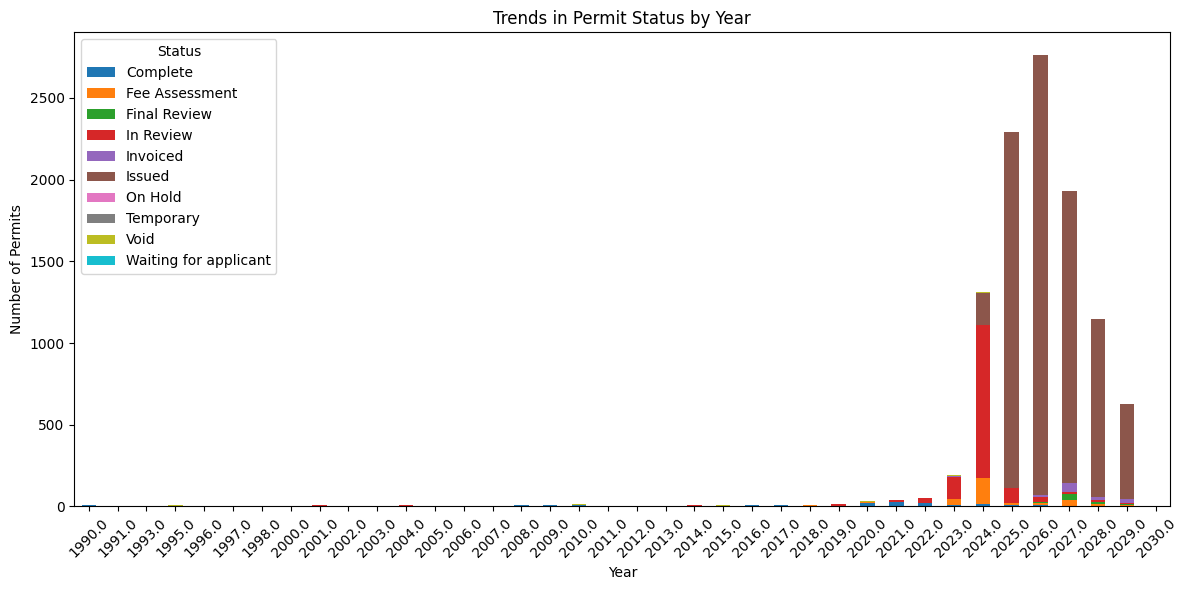

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/Rental_Properties_20241203.csv"
rental_data = pd.read_csv(file_path)

# Convert expiredate to datetime format
rental_data['expiredate'] = pd.to_datetime(rental_data['expiredate'], errors='coerce')

# Extract year from expiredate
rental_data['year'] = rental_data['expiredate'].dt.year

# Group data by year and status
status_trends = rental_data.groupby(['year', 'status']).size().unstack(fill_value=0)

# Plot the trends
status_trends.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Trends in Permit Status by Year")
plt.xlabel("Year")
plt.ylabel("Number of Permits")
plt.xticks(rotation=45)
plt.legend(title="Status")
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import folium

# Updated rental property data including College Mall
data = {
    'geo': [
        'POINT (-86.529 39.162)',
        'POINT (-86.533 39.169)',
        'POINT (-86.520 39.174)',
        'POINT (-86.4957 39.1633)'  # College Mall as a rental property point
    ],
    'property_id': [1, 2, 3, 4]  # Adding College Mall with ID 4
}
data = gpd.GeoDataFrame(data)

# Convert rental property data to a GeoDataFrame
data['geometry'] = data['geo'].apply(lambda x: Point(map(float, x.split('POINT (')[1].rstrip(')').split())))
rental_properties = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")

# Updated data for amenities including College Mall as an amenity
amenities_data = {
    "name": ["Luddy School", "IU Health Hospital", "IU Police Department", "College Mall"],
    "latitude": [39.1727, 39.1664, 39.1675, 39.1633],
    "longitude": [-86.5230, -86.5266, -86.5264, -86.4957]
}
amenities = gpd.GeoDataFrame(
    amenities_data,
    geometry=gpd.points_from_xy(amenities_data["longitude"], amenities_data["latitude"]),
    crs="EPSG:4326"
)

# Reproject to a metric CRS for accurate buffer computation
rental_properties = rental_properties.to_crs(epsg=3857)
amenities = amenities.to_crs(epsg=3857)

# Create 1 km buffer around rental properties
rental_properties['buffer'] = rental_properties.geometry.buffer(1000)

# Reproject back to geographic coordinates for Folium
rental_properties = rental_properties.to_crs(epsg=4326)
amenities = amenities.to_crs(epsg=4326)

# Create a Folium map
m = folium.Map(location=[39.1653, -86.5264], zoom_start=13)  # Example center location

# Add rental properties as markers
for _, row in rental_properties.iterrows():
    icon_color = "green" if row['property_id'] == 4 else "blue"  # Highlight College Mall
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"Rental Property ID: {row['property_id']}",
        icon=folium.Icon(color=icon_color, icon="home")
    ).add_to(m)

# Add 1 km buffers as circles
for _, row in rental_properties.iterrows():
    folium.Circle(
        location=[row.geometry.y, row.geometry.x],
        radius=1000,  # Buffer size in meters
        color="blue",
        fill=True,
        fill_opacity=0.2
    ).add_to(m)

# Add amenities as markers
for _, row in amenities.iterrows():
    icon_color = "green" if row['name'] == "College Mall" else "red"
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=row['name'],
        icon=folium.Icon(color=icon_color, icon="info-sign")
    ).add_to(m)

# Save the map to an HTML file
output_file_path = "/content/Rental_Properties_with_Amenities_and_College_Mall.html"
m.save(output_file_path)

print(f"Map saved as: {output_file_path}")

Map saved as: /content/Rental_Properties_with_Amenities_and_College_Mall.html


<ipython-input-35-81c9285b3864>:18: FutureWarning:

You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.

